In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import sklearn as sk
import matplotlib
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)

Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Figure 6/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
train = sc.read('../data/pancreas.h5ad')
train.obs["cell_type"] = train.obs["celltype"].tolist()
train

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'cell_type'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
top_cell_types = train.obs["cell_type"].value_counts().index.tolist()[:6]
top_cell_types.remove("not applicable")
top_cell_types

['alpha', 'beta', 'ductal', 'acinar', 'delta']

In [5]:
train.obs["cell_type"] = "others"
for cell_type in top_cell_types:
    train.obs.loc[train.obs["celltype"] == cell_type, "cell_type"] = cell_type
train.obs["cell_type"].unique()

array(['acinar', 'beta', 'delta', 'others', 'ductal', 'alpha'],
      dtype=object)

### Figure 6.a

saving figure to file ../results/Figures/Figure 6/umap_batch.pdf


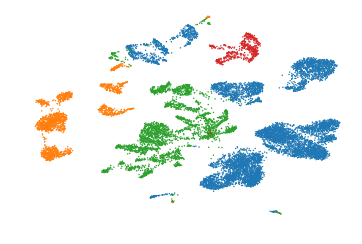

saving figure to file ../results/Figures/Figure 6/umap_celltype.pdf


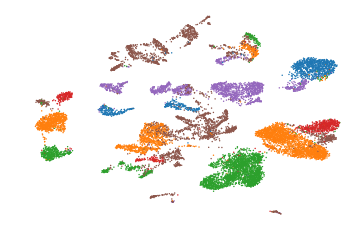

In [9]:
sc.pp.neighbors(train)
sc.tl.umap(train)
sc.pl.umap(train, color=["sample"], title="", legend_loc=False, wspace=.5, show=True, save="_batch.pdf", frameon=False)
sc.pl.umap(train, color=["cell_type"], title="", legend_loc=False, wspace=.5, show=True, save="_celltype.pdf", frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_batch.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_batch_original.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_celltype.pdf"), 
          dst=os.path.join(path_to_save, "Fig6a_umap_celltype_original.pdf"))

In [13]:
sc.tl.pca(train, svd_solver='arpack')
X_pca = train.obsm["X_pca"] * -1
labels = train.obs["batch"].tolist()
print(f" average silhouette_score for original data : {sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for original data : 0.21305911242961884


In [31]:
print("average silhouette_score for scGen: -0.09129691869020462")

average silhouette_score for scGen: -0.09129691869020462


In [29]:
%%bash
python3 ../code/pancreas.py

acinar
alpha
beta
delta
ductal
endothelial
epsilon
gamma
mast
scGen batch corrected pancreas has been saved in ../data/reconstructed/scGen/pancreas.h5ad


2019-04-09 23:49:34.552557: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
... storing 'cell_type' as categorical
... storing 'study' as categorical
... storing 'celltype' as categorical


In [30]:
pancreas_batched = sc.read('../data/reconstructed/scGen/pancreas.h5ad')
pancreas_batched.obs["cell_type"] = train.obs["celltype"].tolist()
pancreas_batched

AnnData object with n_obs × n_vars = 14693 × 2448 
    obs: 'cell_type', 'study', 'celltype'

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Figure 6/umap_pancreas_cell_batched.pdf


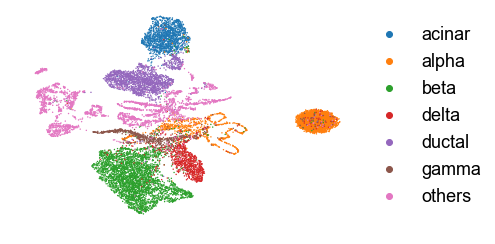

saving figure to file ../results/Figures/Figure 6/umap_study_pancreas_batched.pdf


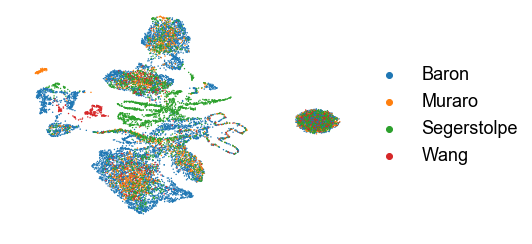

In [31]:
sc.pp.neighbors(pancreas_batched)
sc.tl.umap(pancreas_batched)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["celltype"],
           save="_pancreas_cell_batched.pdf", frameon=False, show=True, legend_fontsize=18)
sc.pl.umap(pancreas_batched, title="", palette=matplotlib.rcParams["axes.prop_cycle"], color=["study"],
           save="_study_pancreas_batched.pdf", frameon=False, show=True, legend_fontsize=18)
os.rename(src=os.path.join(path_to_save, "umap_pancreas_cell_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_celltype.pdf"))
os.rename(src=os.path.join(path_to_save, "umap_study_pancreas_batched.pdf"),
          dst=os.path.join(path_to_save, "Fig6b_umap_scgen_batch.pdf"))

In [32]:
sc.tl.pca(pancreas_batched, svd_solver='arpack')
X_pca = pancreas_batched.obsm["X_pca"] * -1
labels = pancreas_batched.obs["study"].tolist()
print(f" average silhouette_score for scGen  :{sk.metrics.silhouette_score(X_pca, labels)}")

 average silhouette_score for scGen  :-0.10269075632095337
